## **SUPERVISED MACHINE LEARNING : MILEAGE PREDICTION**

Source:

     This data set was taken from the StstLib library which is maintained at Camegie mellon University.The dataset was used in the 1983 American Statistical Association Exposition.

DataSet info:
    
     This dataset is a slightly modified version of the dataset provided in the StatLib library .In line with the use by Ross Quinian (1993) in predicting the attribute "mpg" ,8 of the original instances were removed because they had unknow values for the "mpg" attribute.The Original dataset is available in the file "auto-mpg.data-original".
     The data concerns city-cycle fuel consumption in miles per gallon ,to be predicted in terms of 3 multivalued discrete and 5 continuous attributes .(Quinian,1993)

Attribute information:
  1. mpg: continuous
  2. cylinders: multi-valued discrete
  3. displacement: continuous
  4. horsepower: continuous
  5. weight: continuous
  6. acceleration: continuous
  7. model year: multi-valued discrete
  8. origin: multi-valued discrete
  9. car name: String(unique for each instance)

## **importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing data set**

In [2]:
df = pd.read_csv("https://github.com/ybifoundation/Dataset/raw/main/MPG.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## **DATA PREPROCESSING**

In [3]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## **Removing Missing values**

In [6]:
df.dropna(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


## **Data visualizition**

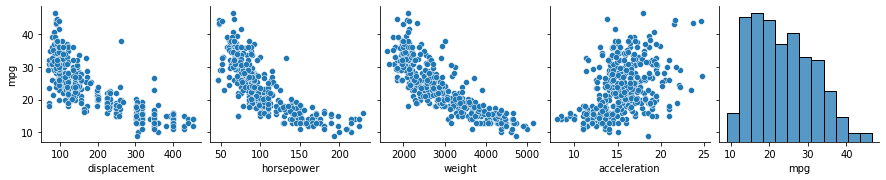

In [8]:
sns.pairplot(df,x_vars =['displacement' , 'horsepower','weight','acceleration','mpg'] , y_vars=['mpg'])

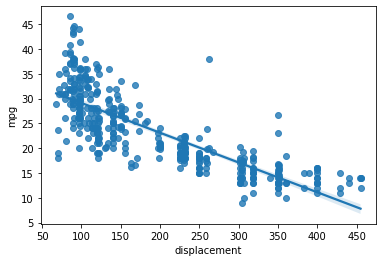

In [10]:
sns.regplot(x='displacement' , y='mpg' , data = df)

## **define target variable y and feature x**

In [11]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [12]:
y =df['mpg']

In [13]:
y.shape

(392,)

In [14]:
x=df[['displacement', 'horsepower', 'weight',
       'acceleration']]

In [15]:
x.shape

(392, 4)

In [16]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


## **Scaling data / standardizaton**

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss = StandardScaler()

In [19]:
x = ss.fit_transform(x)

In [20]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [21]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-2.537653e-16,-4.392745e-16,5.607759e-17,6.117555e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


# **Train Test Split data**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test =train_test_split (x,y,train_size=0.7,random_state=2529)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

## **Linear Regression Model**

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
lr.intercept_

23.485738559737584

In [29]:
lr.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

**Equation**

Mileage = 23.4 - 1.05 displacement -1.68 horsepower-4.10 weight-0.11 acceleration + error

## **Predict Test Data**

In [30]:
y_pred = lr.predict(x_test)

In [31]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

## **Model Accuracy**

In [32]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score 

In [33]:
mean_absolute_error(y_test,y_pred)

3.3286968643244106

In [34]:
mean_absolute_percentage_error(y_test,y_pred)

0.14713035779536746

In [35]:
r2_score(y_test,y_pred)

0.7031250746717692

## **Polynomial Regression**

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
poly = PolynomialFeatures (degree = 2 , interaction_only=True, include_bias=False)

In [38]:
x_train2=poly.fit_transform(x_train)

In [39]:
x_test2=poly.fit_transform(x_test)

In [40]:
lr.fit(x_train2,y_train)

LinearRegression()

In [41]:
lr.intercept_

21.27336450063766

In [42]:
lr.coef_

array([-2.76070596, -5.00559628, -1.36884133, -0.81225214,  1.24596571,
       -0.12475017, -0.90542822,  1.35064048, -0.17337823,  1.41680398])

In [43]:
y_pred_poly = lr.predict(x_test2)

## **Model Accuracy**

In [44]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [45]:
mean_absolute_error(y_test,y_pred_poly)


2.7887147720295977

In [46]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.1207401834293869

In [47]:
r2_score(y_test,y_pred_poly)

0.7461731314563803

## **SUPERVISED MACHINE LEARNING : DIGIT CLASSIFICATION**

## **Hand written digit prediction classification analysis**
The digit Dataset consist of 8 * 8 pixel images of digits .The images attribute of dataset stores 8 * 8 arrays of gray scale
   values for each image .we will use this arrays to visualise the first 4 images .The target attribute of the dataset stores the digit each image represent.


## **Import Libraries**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Importing data**

In [49]:
from sklearn.datasets import load_digits  

In [50]:
df = load_digits()

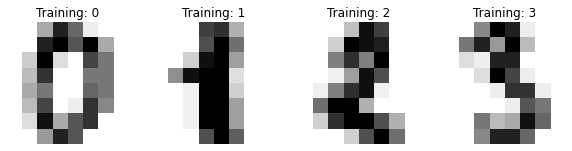

In [51]:
_,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title("Training: %i" %label)

## **Flatten image**

In [52]:
df.images.shape

(1797, 8, 8)

In [53]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [54]:
df.images[0].shape

(8, 8)

In [55]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [56]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [57]:
data[0].shape

(64,)

## **Scaling Data**

In [58]:
data.min()

0.0

In [59]:
data.max()

16.0

In [60]:
data=data/16

In [61]:
data.shape

(1797, 64)

## **Train test split**

In [62]:
from sklearn.model_selection import train_test_split 

In [63]:
x_train,x_test,y_train,y_test=train_test_split(data,df.target,train_size=0.7,random_state=2529)

In [64]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Random Forest model**

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [66]:
rf.fit(x_train,y_train)

RandomForestClassifier()

## **Predict Test**

In [67]:
y_pred=rf.predict(x_test)

In [68]:
y_pred

array([1, 9, 4, 1, 1, 0, 6, 9, 6, 0, 0, 9, 6, 4, 5, 6, 8, 8, 8, 3, 0, 1,
       2, 0, 8, 3, 1, 1, 7, 5, 0, 4, 1, 9, 5, 5, 4, 7, 1, 5, 7, 5, 7, 3,
       3, 7, 6, 1, 9, 8, 0, 9, 7, 1, 9, 3, 4, 0, 8, 3, 0, 9, 8, 1, 5, 5,
       0, 5, 7, 9, 5, 2, 6, 8, 4, 2, 2, 2, 8, 0, 4, 2, 1, 0, 7, 5, 5, 2,
       1, 4, 9, 2, 4, 8, 2, 4, 9, 5, 4, 5, 1, 7, 1, 7, 7, 4, 2, 0, 0, 5,
       1, 5, 7, 0, 1, 1, 9, 2, 5, 6, 8, 5, 7, 1, 1, 1, 9, 6, 9, 8, 7, 8,
       7, 4, 7, 2, 9, 1, 8, 1, 2, 0, 8, 1, 2, 6, 3, 2, 3, 8, 1, 2, 1, 6,
       9, 8, 9, 1, 4, 1, 7, 4, 5, 9, 1, 0, 6, 1, 7, 8, 1, 0, 7, 2, 3, 5,
       5, 5, 1, 9, 5, 9, 5, 0, 1, 0, 3, 2, 9, 0, 8, 3, 5, 7, 3, 9, 8, 7,
       4, 1, 6, 7, 8, 2, 6, 0, 6, 0, 7, 3, 1, 6, 2, 4, 6, 8, 5, 6, 2, 6,
       5, 8, 7, 4, 2, 8, 9, 9, 3, 1, 4, 4, 7, 9, 1, 6, 3, 1, 9, 6, 4, 5,
       0, 4, 2, 9, 0, 2, 0, 3, 8, 1, 2, 9, 1, 5, 2, 7, 0, 7, 9, 6, 6, 3,
       1, 6, 3, 3, 6, 1, 1, 3, 5, 7, 8, 1, 5, 1, 0, 3, 7, 2, 7, 8, 7, 8,
       8, 3, 3, 5, 9, 5, 7, 2, 0, 7, 7, 0, 6, 4, 1,

## **Model Accuracy**

In [85]:
from sklearn.metrics import confusion_matrix,classification_report

In [86]:
confusion_matrix(y_test,y_pred)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 64,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 61,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 55,  0,  0,  1,  1],
       [ 0,  1,  0,  0,  0,  1, 49,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0,  1, 47,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  1,  1, 48]])

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.91      1.00      0.96        64
           2       1.00      1.00      1.00        61
           3       0.98      0.96      0.97        52
           4       0.98      1.00      0.99        54
           5       0.93      0.95      0.94        58
           6       1.00      0.94      0.97        52
           7       0.94      1.00      0.97        50
           8       0.94      0.89      0.91        53
           9       0.98      0.91      0.94        53

    accuracy                           0.96       540
   macro avg       0.97      0.96      0.97       540
weighted avg       0.97      0.96      0.96       540

